<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning: Decision Tree Classification**
* The CART algorithm (Gini Index)
* The C5.0 algorithm (Entropy)

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
# The adult_training dataset has several numeric and categoric predictors about adults, their
# occupation, marital status, economic status, financial status, etc.

adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")



In [ ]:
# We will use Income as the target class in this exercise

adultDF.head()


,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


## **Training Data Preparation for Classification**


* For simplicity, only two predictors and the target are retained, as follows:

> * **Marital status**: a categorical predictor with classes married, divorced, never‐married, separated, and widowed.
> * **Cap_gains_losses**: a numerical predictor, equal to **capital gains + |capital losses|**.
> * **Income**: a categorical target variable with two classes >50k and ≤50k

In [ ]:
# Create a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)


,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


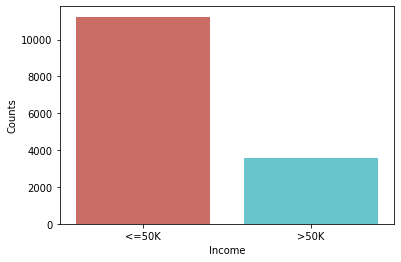

In [ ]:
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=new_adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()



In [ ]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)


,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


## **Train_Test_Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)



In [ ]:
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)



Training size: (11837, 2)
Test size: (2960, 2)


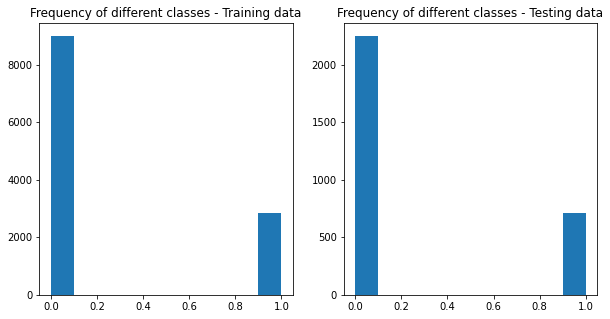

In [ ]:
# Find out class distributions in training and test datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');




## **Training, Plotting, and Printing Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


### **The CART Classifier**

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1811.00
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



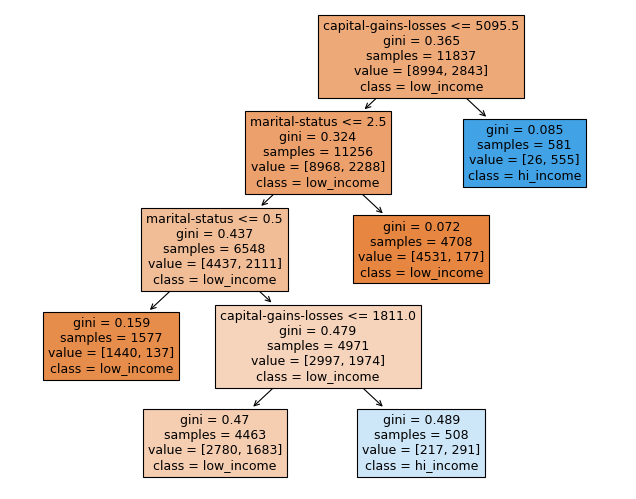

In [ ]:
# The CART tree; try different values for max_depth and max_leaf_nodes
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)


# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)



### **The C5.0 Classifier**

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1



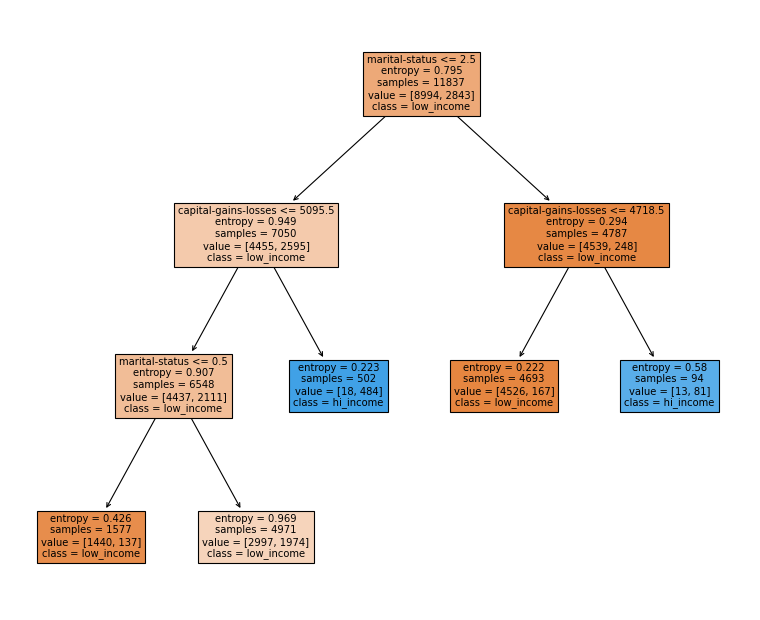

In [ ]:
# The C5.0 tree; try different values for max_depth and max_leaf_nodes
c5_classifier = DecisionTreeClassifier(criterion = "entropy", 
                                       max_leaf_nodes=5,
                                       random_state = 120).fit(X_train,y_train)


# Control the figure size
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)


# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(c5_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled=True)


# Print the text version of the tree
text_representation = tree.export_text(c5_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)





## **Accuracy Scores on the Training and Test Datasets**

In [ ]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))


# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))





CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.80, 0.80


## **The Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

# Record CART's and C5's predictions
cart_predictions = cart_classifier.predict(X_test)
c5_predictions = c5_classifier.predict(X_test)


# Compute TP, TN, FP, FN values for CART
cart_cm = confusion_matrix(y_true=y_test, 
                           y_pred = cart_predictions)

c5_cm = confusion_matrix(y_true=y_test, 
                        y_pred = c5_predictions)

# Print CART's confusion matrix
print(cart_cm)

print("-----------")

# Print C5's confusion matrix
print(c5_cm)


[[2187   62]
 [ 511  200]]
-----------
[[2235   14]
 [ 583  128]]


Text(0.5, 89.87999999999997, 'Predicted label')

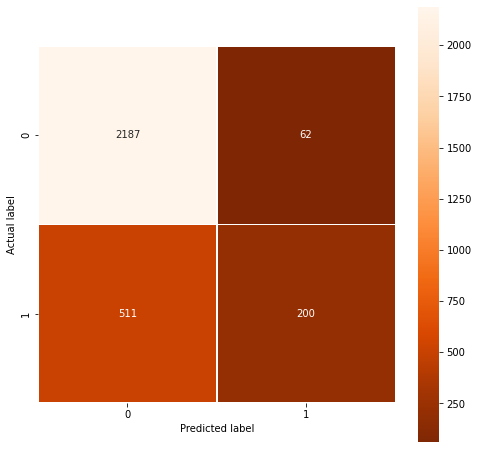

In [ ]:
# Visualize CART's confusion matrix as a heatmap

import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cart_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')



Text(0.5, 89.87999999999997, 'Predicted label')

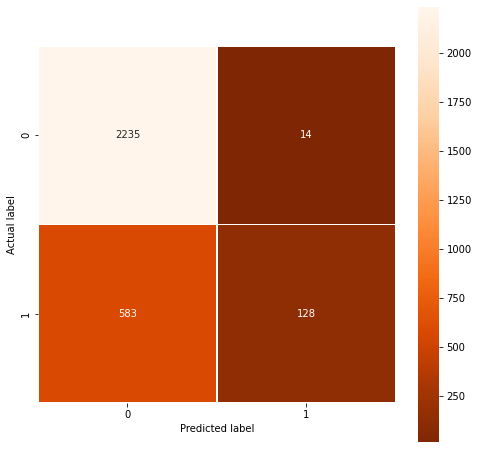

In [ ]:
# Visualize C5's confusion matrix as a heatmap

import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(c5_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')



## **Summary**

* Side-by-side comparison of the 2 models demonstrates that both CART and C5.0 produce similar classification accuracy on the dataset.
* As an exercise, it will be worthwhile to further study the effect of the train-test split on the classification accuracy.
* V-fold cross validation will provide more reliable estimates of the two models' classification accuracy.

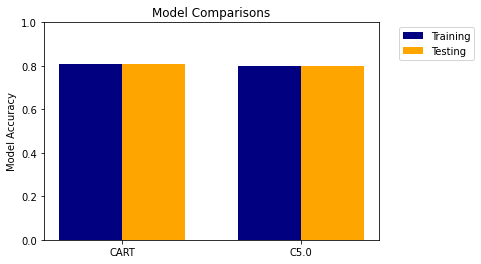

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['CART', 'C5.0']
training_scores = [score1, score3]
testing_scores =  [score2, score4]

x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()



# **References**

* https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
